# 数据分析P2项目 - 彭冰

# 1 数据预览

In [1]:
# 导入相应的包

import numpy as np
import pandas as pd

In [2]:
# 读取CSV文件
# 定义titanic.csv文件路径

filePath = 'titanic-data.csv'

# 读取titanic.csv文件
# titanic_df作为存放CSV的DataFrame

titanic_df = pd.read_csv(filePath)

In [3]:
titanic_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

# 1.1提出问题

1、铁达尼号的生还率是多少？

2、样本中平均死亡年龄？生还年龄？

3、哪些因素影响了生还率？

4、年龄和生还率的相关性有多大？船舱等级和生还率相关性有多大？性别和生还率相关性有多大？

5、列举三个自变量和一个因变量

# 1.2初步分析

In [4]:
# 计算生还人数、死亡人数

totalOfSurvived = titanic_df[ titanic_df['Survived'] == 1 ].index.tolist()

totalOfDead = titanic_df[ titanic_df['Survived'] == 0 ].index.tolist()

meanOfSurvived = titanic_df['Survived'].mean()

print('生还人数:%d\n生还率:%f\n死亡人数:%d\n死亡率:%f' % ( len(totalOfSurvived),meanOfSurvived,len(totalOfDead),1-meanOfSurvived) )


生还人数:342
生还率:0.383838
死亡人数:549
死亡率:0.616162


In [5]:
# 计算平均生还年龄和平均死亡年龄

average_age_of_survived = titanic_df[ titanic_df['Survived'] == 1 ]['Age'].mean()
average_age_of_dead = titanic_df[ titanic_df['Survived'] == 0 ]['Age'].mean()

print('平均生还年龄:%f\n平均死亡年龄:%f' % (average_age_of_survived,average_age_of_dead))



平均生还年龄:28.343690
平均死亡年龄:30.626179


# 2 相关属性分布

In [6]:
####################################
# 属性分步分析
####################################
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# 2.1 生还情况分布

Survived
0    549
1    342
Name: Survived, dtype: int64


([<matplotlib.patches.Wedge at 0x1173e6320>,
  <matplotlib.text.Text at 0x1173fa198>])

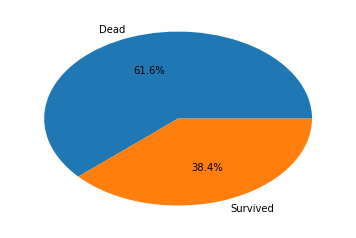

In [7]:
Survived_count =  titanic_df.groupby('Survived')['Survived'].count()
print(Survived_count)
plt.pie(Survived_count, labels=['Dead','Survived'], autopct='%.1f%%')

可以看出铁达尼事故中死亡人数明显大于生还人数，死亡人数约为61.6%，生还人数约为38.4%

# 2.2 乘客船舱等级分布

3：下等舱
2：中等舱
1：头等舱

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64


([<matplotlib.patches.Wedge at 0x11752a8d0>,
  <matplotlib.text.Text at 0x117541940>])

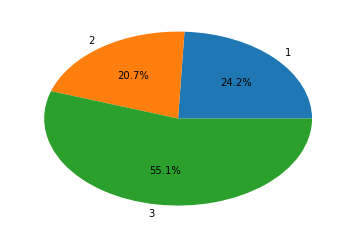

In [8]:
pclass_count =  titanic_df.groupby('Pclass')['Pclass'].count()
print(pclass_count)
plt.pie(pclass_count, labels=['1','2','3'], autopct='%.1f%%')

乘坐铁达尼三等舱的人数明显多于头等舱和二等舱，约占了总人数的一半，头等舱人数和二等舱人数差不多

# 2.3 年龄分布

In [9]:
# 定义去除columns值为空的记录的方法
def formatNullColumns(dataFrame, columns):
    dataFrameNotNull = dataFrame[ dataFrame[columns].notnull() | dataFrame[columns].apply(lambda x:str(x).isspace())]
    return dataFrameNotNull

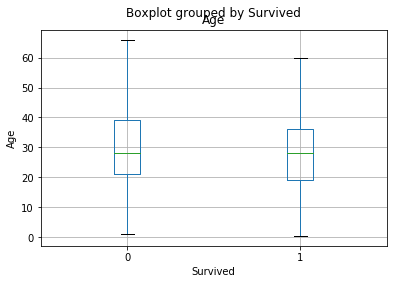

In [10]:
formatNullColumns(titanic_df,'Age').boxplot(column='Age',by='Survived',showfliers=False)
plt.ylabel('Age')
plt.show()


按照年龄分别对死亡和生还两种情况进行统计，可以看出生还和死亡的人数大多集中在20-40岁之间，但这并不能说明什么，因为样本的分步主要集中在20-40岁之间，必然导致在这个区间中的死亡人数和生还人数偏多

# 2.5 性别况分布

Sex
female    314
male      577
Name: Sex, dtype: int64


([<matplotlib.patches.Wedge at 0x1176f0e80>,
  <matplotlib.text.Text at 0x1177ebcf8>])

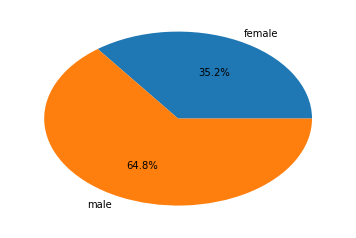

In [11]:
sex_count =  titanic_df.groupby('Sex')['Sex'].count()
print(sex_count)
plt.pie(sex_count, labels=['female','male'], autopct='%.1f%%')

可以看出铁达尼上的男人比女人多，男性占总人数的64.8%，女性占总人数的35.2%

# 3 属性与生还率关联统计

# 3.1 船舱等级和性别对生还率的对比 

In [12]:
# 定义计算相关性的方法
# @param dataFrame 需处理的dataframe
#        columns   相关的属性
def correlationSurvivedByAny(dataFrame, columns):
    # 对某列进行非空处理
    dataFrameNotNull = dataFrame[ dataFrame[columns].notnull() | dataFrame[columns].apply(lambda x:str(x).isspace())]
    
    std_columns = dataFrameNotNull[columns].sub( dataFrameNotNull[columns].mean() ) / dataFrameNotNull[columns].std(ddof=0)
    
    std_survived = dataFrameNotNull.Survived.sub( dataFrameNotNull.Survived.mean() ) / dataFrameNotNull.Survived.std(ddof=0)
    
    return (std_columns * std_survived).mean()



In [13]:
# 定义生存率计算和绘图方法
def survival_rate(dataFrame,key):
    dataFrame.groupby(key)['Survived'].mean().plot(kind='bar')
    plt.ylabel('Survival Rate')
    plt.title('Survival rate by {}'.format(key))

    
# 两个变量生存率对比的方法    
def survival_rate_by_twokeys(dataFrame,key1,key2):
    dataFrame.groupby([key1,key2]).mean()['Survived'].unstack().plot(kind='bar')
    plt.ylabel('Survival Rate')
    plt.title('Survival Rate By {} And {}'.format(key1,key2))
    plt.show()
    
# 两个变量相关人数对比的方法
def numbers_by_twokeys(dataFrame,key1,key2):
    dataFrame.groupby([key1,key2]).count()['Survived'].unstack().plot(kind='bar')
    plt.ylabel('Count')
    plt.title('Number of passenger by {} and {}'.format(key1,key2))
    plt.show()

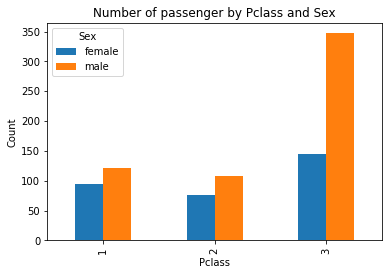

In [14]:
# 两个变量相关人数的对比
# 下图为pclass和Sex的人数对比
numbers_by_twokeys(titanic_df,'Pclass','Sex')

从按照性别和船舱等级对生还人数的统计，可以看出无论是在哪个等级的船舱，女性的生还人数都比男性多，并且在三等舱的女性生还者要明显多于男性生还者

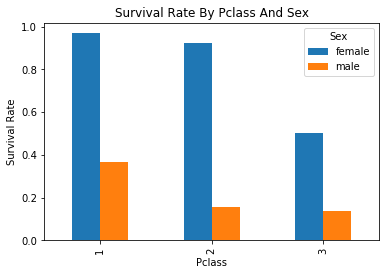

In [15]:
# 两个变量对生存率影响的对比
# 下图为pclass和Sex的生存率对比
survival_rate_by_twokeys(titanic_df,'Pclass','Sex')

从按照性别和船舱等级对生还率的统计，可以看出无论是在哪个等级的船舱，女性的生还率都比男性高，而且三等舱的女性生还率明显低于头等舱和二等舱的，头等舱的男性生还率明显高于二等舱和三等舱的

# 3.2 Parch和SibSp对生还率的对比

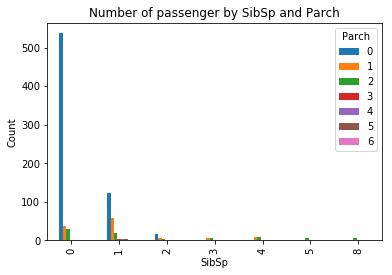

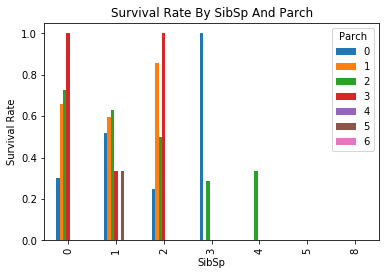

In [16]:


# 两个变量相关人数的对比
# 下图为SibSp和Parch的人数对比
numbers_by_twokeys(titanic_df,'SibSp','Parch')

# 两个变量对生存率影响的对比
# 下图为SibSp和Parch的生存率对比
survival_rate_by_twokeys(titanic_df,'SibSp','Parch')

从上图parch和sibsp人数对比图可以看出，在铁达尼上没有兄弟姐妹或亲人孩子的人数居多

# 3.3 船舱等级和年龄对生还率的对比

/Users/chris/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


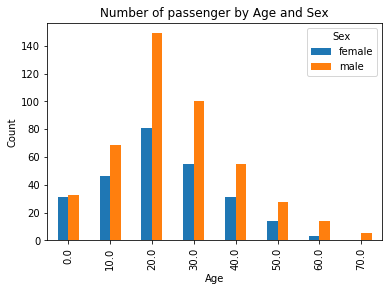

In [17]:
# 统计依据性别不同的生还人数对比
format_df = formatNullColumns(titanic_df,'Age')

#将年龄按照10年为组距进行统计，否则噪点太多
format_df.loc[(format_df.Age <= 10) & (format_df.Age > 0 ),'Age'] = 0
format_df.loc[(format_df.Age <= 20) & (format_df.Age > 10),'Age'] = 10
format_df.loc[(format_df.Age <= 30) & (format_df.Age > 20),'Age'] = 20
format_df.loc[(format_df.Age <= 40) & (format_df.Age > 30),'Age'] = 30
format_df.loc[(format_df.Age <= 50) & (format_df.Age > 40),'Age'] = 40
format_df.loc[(format_df.Age <= 60) & (format_df.Age > 50),'Age'] = 50
format_df.loc[(format_df.Age <= 70) & (format_df.Age > 60),'Age'] = 60
format_df.loc[(format_df.Age <= 80) & (format_df.Age > 70),'Age'] = 70
format_df.loc[(format_df.Age <= 90) & (format_df.Age > 80),'Age'] = 80
# 两个变量相关人数的对比
# 下图为pclass和Age的人数对比
numbers_by_twokeys(format_df,'Age','Sex')

1、因为数据中空值存在，对数据集进行非空处理，删除Age为空的数据记录，并对Age进行分类，每10个年龄段为一组
2、按照年龄和性别对人数进行统计，从图表可以看出，每个年龄段的男性要比女性多，其中20-30岁的男性和女性要多于其他年龄段的

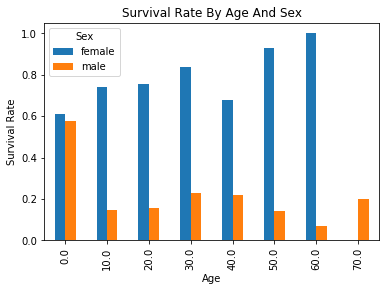

In [18]:
# 两个变量对生存率影响的对比
# 下图为pclass和Age的生存率对比
survival_rate_by_twokeys(format_df,'Age','Sex')

1、0-10岁和70-80岁的样本量太小，可以做为异常值处理
2、从图中可以看出，在各个年龄段的女性生还率都高于男性生还率

# 3.4 Pclass与生还率的关联

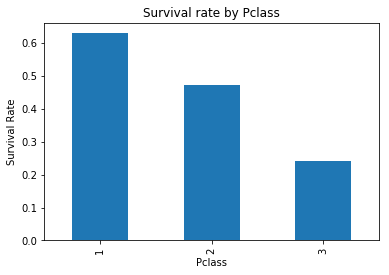

In [19]:
# 统计pclass与生还率的关联
survival_rate(titanic_df,'Pclass')

In [20]:
correlationSurvivedByAny(titanic_df, 'Pclass')

-0.33848103596101325

船舱等级和生存率成负相关，即Pclass越低死亡率越高，皮尔逊积矩 r=-0.33848103596101325

# 3.5 Age与生还率的关联

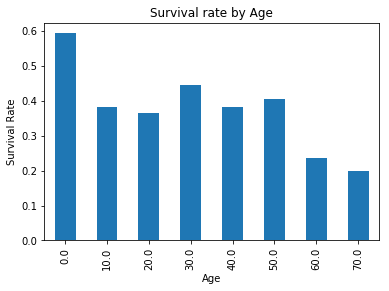

In [21]:
# 统计pclass与生还率的关联
survival_rate(format_df,'Age')

In [22]:
correlationSurvivedByAny(formatNullColumns(titanic_df,'Age'), 'Age')

-0.0772210945721773

皮尔逊积矩 r=-0.0772210945721773 年龄和生还率相关性不大

# 3.6 Sex与生存率的关联

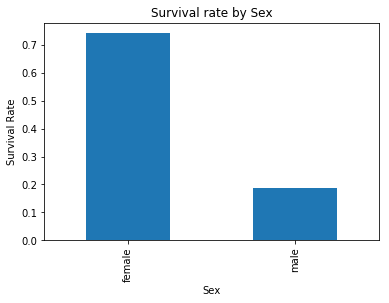

In [23]:
# Sex与生存率的关联
survival_rate(titanic_df,'Sex')

In [24]:
# Sex与生存率的关联
titanic_df_sex = titanic_df
titanic_df_sex.loc[titanic_df_sex.Sex == 'male','Sex'] = 1
titanic_df_sex.loc[titanic_df_sex.Sex == 'female','Sex'] = 0
correlationSurvivedByAny(titanic_df_sex, 'Sex')

-0.54335138065774724

性别和生存率成负相关，皮尔逊积矩 r=-0.54335138065774724

# 4 回答问题

1、铁达尼号的生还率是多少？

    答：0.383838

2、样本中平均死亡年龄？生还年龄？
    
    答：平均生还年龄:28.3；平均死亡年龄:30.6


3、哪些因素影响了生还率？

    答：船舱等级，性别对生还率的影响较大

4、年龄和生还率的相关性有多大？船舱等级和生还率相关性有多大？性别和生还率相关性有多大？

    答：Age相关率 -0.077       Pclass相关率 -0.34      Sex相关率 -0.54
        

5、列举三个自变量和一个因变量

    答：
    1、自变量：乘客年龄；乘客船舱等级；乘客性别
    2、因变量：乘客的生还率
        

# 5 结论

# 5.1 样本量局限不能说明问题

    答：样本量分步不是很均匀，比如在分析Age和生存率的关系时，小于20岁大于40岁的样本量明显要少于20-40岁之间的人数，所以在进行生存率分析时，这两个区间和其他区间进行对比的结果就不会准确，但20-40之间各年龄段（10岁）之间的分析相对准确

# 5.2 数据集的预处理

    在本项目中，我针对数据集进行了Age非空处理和修改Age范围的处理:
    1、非空处理：非空处理是删除年龄为空的记录
    2、修改Age范围处理：将年龄按照每10岁为一个年龄段的方式，例如34岁属于30-40之间，在绘图显示中以30代替
    3、首先非空处理会降低样本空间，减少可供探索的数据；而修改Age范围会造成年龄的极端化，比如小于10岁和大于60岁的人要比年龄在20-40岁之间的人少的多
    4、样本空间减少会让数据分析的结果不够准确；Age分段会造成相对于Age进行生还率分析的时候是极端化年龄段出现差异的可能性变大

# 5.3 存在其他影响生存率的变量

    受教育水平，身体状况，体重（胖人脂肪多，奈冷），是否会游泳等因素或许会影响生存率，这些在数据集中并没有体现出来

# 5.4 相关性分析

    从分析中可以看出Pclass和Sex对生还率的关联较大，皮尔逊积矩相关系数分别为 r=-0.33848103596101325和r=-0.54335138065774724，但这些只是两者的相关性，并不代表因果关系。
    咨询问题：是否皮尔逊相关系数为1或-1的时候，就可以说明两者存在因果关系？